# CAP5415 2014
# Assignment 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv  # via $ pip install opencv-contrib-python

## Problem 1
Write a function that convolves an image with a given convolution filter
function [output_Image]= myImageFilter( Input_image, filter)

In [20]:
def convolve(img, kernel):
	""" Perform a 2D convolution with kernel on img.
	Returns the result of the convolution.
	stride = 1
	padding = None
	"""
	x, y = img.shape
	fx, fy = kernel.shape
	px, py = (x - fx + 1, y - fy + 1)

	result = np.zeros((px, py))

	for i in range(px):
		for j in range(py):
			img_piece = img[i: (i + fx), j: (j + fy)]
			prod = img_piece * kernel
			value = np.sum(prod)
			# print value.shape
			result[i, j] = value

	return result

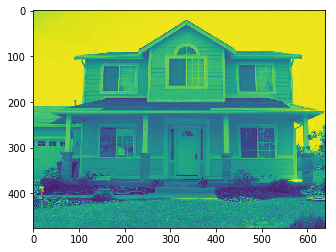

In [21]:
img = plt.imread('House1.jpg')
plt.imshow(img)

### Averaging Kernel, 3x3 and 5x5

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


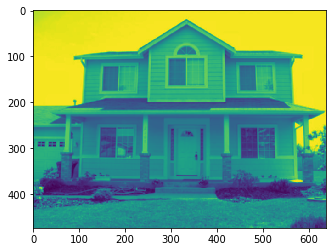

In [22]:
avg3_3 = np.ones((3,3)) / 9
print avg3_3

result = convolve(img, avg3_3)
plt.imshow(result)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


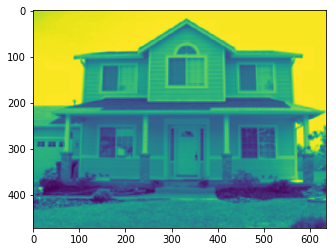

In [23]:
avg5_5 = np.ones((5, 5))
print avg5_5

result = convolve(img, avg5_5)
plt.imshow(result)

### Gaussian Kernel, $\sigma=1,2,3$

In [24]:
sigmas = [1,2,3]

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.25  ]
 [0.0625 0.125  0.0625]]


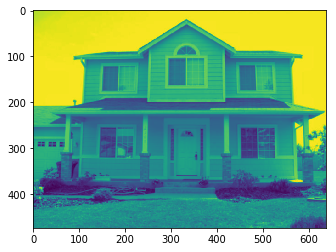

In [25]:
gaussian_1 = np.zeros((3,3))
gaussian_1[0, :] = [1, 2, 1]
gaussian_1[1, :] = [2, 4, 4]
gaussian_1[2, :] = [1, 2, 1]
gaussian_1 /= 16
print gaussian_1
result = convolve(img, gaussian_1)
plt.imshow(result)

[[0.003663   0.01465201 0.02564103 0.01465201 0.003663  ]
 [0.01465201 0.05860806 0.0952381  0.05860806 0.01465201]
 [0.02564103 0.0952381  0.15018315 0.0952381  0.02564103]
 [0.01465201 0.05860806 0.0952381  0.05860806 0.01465201]
 [0.003663   0.01465201 0.02564103 0.01465201 0.003663  ]]


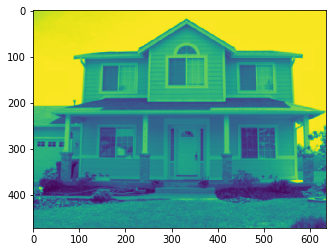

In [26]:
gaussian_2 = np.zeros((5, 5))
gaussian_2[:, :] = [
    [1, 4, 7, 4, 1],
    [4, 16, 26, 16, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1, 4, 7, 4, 1],
]
gaussian_2 /= 273
print gaussian_2
result = convolve(img, gaussian_2)

plt.imshow(result)

[[3.60000e-05 3.63000e-04 1.44600e-03 2.29100e-03 1.44600e-03 3.63000e-04
  3.60000e-05]
 [3.63000e-04 3.67600e-03 1.46620e-02 2.32260e-02 1.46620e-02 3.67600e-03
  3.63000e-04]
 [1.44600e-03 1.46620e-02 5.84880e-02 9.26510e-02 5.84880e-02 1.46620e-02
  1.44600e-03]
 [2.29100e-03 2.32260e-02 9.26510e-02 1.46768e-01 9.26510e-02 2.32260e-02
  2.29100e-03]
 [1.44600e-03 1.46620e-02 5.84880e-02 9.26510e-02 5.84880e-02 1.46620e-02
  1.44600e-03]
 [3.63000e-04 3.67600e-03 1.46620e-02 2.32260e-02 1.46620e-02 3.67600e-03
  3.63000e-04]
 [3.60000e-05 3.63000e-04 1.44600e-03 2.29100e-03 1.44600e-03 3.63000e-04
  3.60000e-05]]


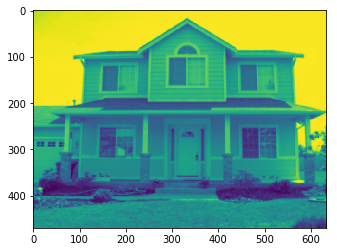

In [31]:
gaussian_3 = np.zeros((7, 7))
gaussian_3[:, :] = [
    [0.000036, 0.000363, 0.001446, 0.002291, 0.001446, 0.000363, 0.000036],
    [0.000363, 0.003676, 0.014662, 0.023226, 0.014662, 0.003676, 0.000363],
    [0.001446, 0.014662, 0.058488, 0.092651, 0.058488, 0.014662, 0.001446],
    [0.002291, 0.023226, 0.092651, 0.146768, 0.092651, 0.023226, 0.002291],
    [0.001446, 0.014662, 0.058488, 0.092651, 0.058488, 0.014662, 0.001446],
    [0.000363, 0.003676, 0.014662, 0.023226, 0.014662, 0.003676, 0.000363],
    [0.000036, 0.000363, 0.001446, 0.002291, 0.001446, 0.000363, 0.000036]
]
print gaussian_3
result = convolve(img, gaussian_3)

plt.imshow(result)

### Sobel Kernel

[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


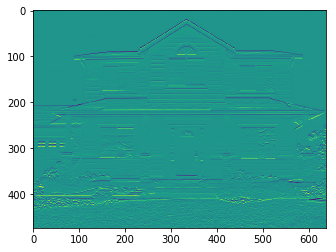

In [27]:
sobel_x = np.zeros((3,3), dtype=np.int)
sobel_x[0, :] = [-1, -2, -1]
sobel_x[1, :] = [0, 0, 0]
sobel_x[2, :] = [1, 2, 1]
print sobel_x

result_x = convolve(img, sobel_x)
plt.imshow(result_x)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


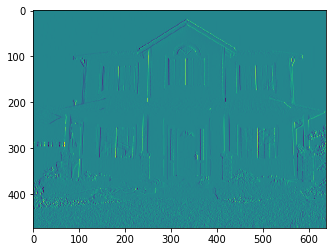

In [28]:
sobel_y = np.transpose(np.copy(sobel_x))
print sobel_y
result_y = convolve(img, sobel_y)
plt.imshow(result_y)

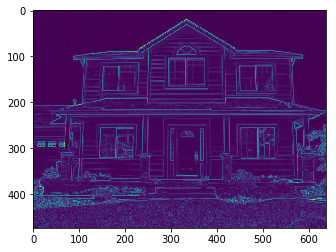

In [29]:
result = np.zeros(result_y.shape)
result = np.sqrt(result_x**2 + result_y**2)
plt.imshow(result)

### Prewitt Edge Operator

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


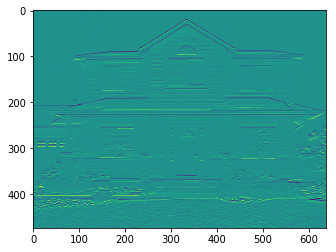

In [33]:
prewitt_x = np.zeros((3,3), dtype=np.int)
prewitt_x[0, :] = [-1, -1, -1]
prewitt_x[1, :] = [0, 0, 0]
prewitt_x[2, :] = [1, 1, 1]
print prewitt_x

result_x = convolve(img, prewitt_x)
plt.imshow(result_x)

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


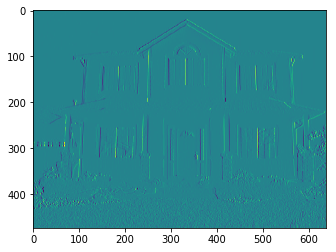

In [34]:
prewitt_y = np.transpose(np.copy(prewitt_x))
print prewitt_y
result_y = convolve(img, prewitt_y)
plt.imshow(result_y)

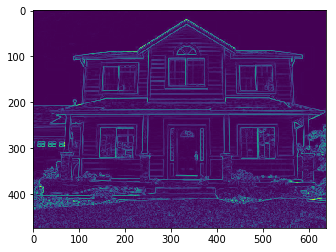

In [35]:
result = np.zeros(result_y.shape)
result = np.sqrt(result_x**2 + result_y**2)
plt.imshow(result)

# Problem 2
Attached ‘Noisy image1’ and ‘Noisy image2’ are corrupted by salt and paper noise. Apply 5 by 5 Averaging and Median filter and show your outputs. Why Median filter works better than averaging filter?

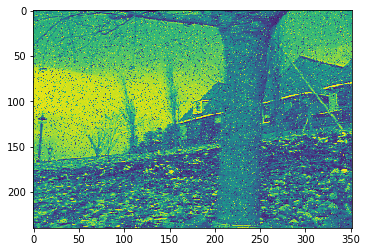

In [36]:
img1 = plt.imread('./Noisyimage1.jpg')
plt.imshow(img1)

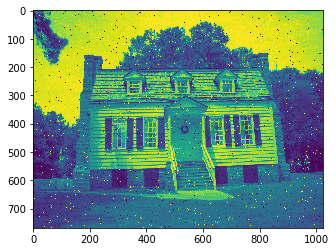

In [37]:
img2 = plt.imread('./Noisyimage2.jpg')
plt.imshow(img2)

Avg. filtering

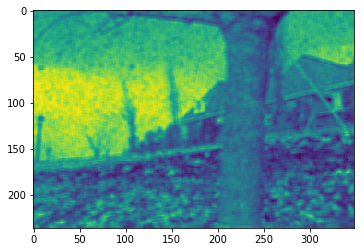

In [40]:
result = convolve(imgs[0], avg5_5)
plt.imshow(result)

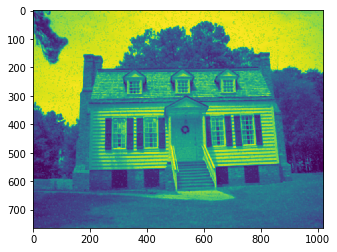

In [41]:
result = convolve(imgs[1], avg5_5)
plt.imshow(result)

In [42]:
def medianfilter(img, fx, fy):
	x, y = img.shape
	px, py = (x - fx + 1, y - fy + 1)

	result = np.zeros((px, py))

	for i in range(px):
		for j in range(py):
			img_piece = img[i: (i + fx), j: (j + fy)]
			value = np.median(img_piece.ravel())
			result[i, j] = value

	return result

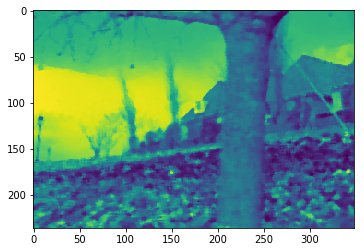

In [43]:
plt.imshow(medianfilter(imgs[0], 5, 5))

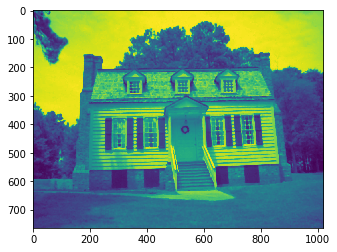

In [44]:
plt.imshow(medianfilter(imgs[1], 5, 5))

# Problem 3
Compute gradient magnitude for attached image ‘Q3_Image’ (using Matlab built-in function gradient);

i. Stretch the resulting magnitude (between 0 to 255) for better visualization

ii. Compute the histogram of gradient magnitude

iii. Compute gradient orientation ( the angle of gradient vector)

iv. Compute histogram of gradient orientation (angle between 0 and 2*pi)

(256, 256)


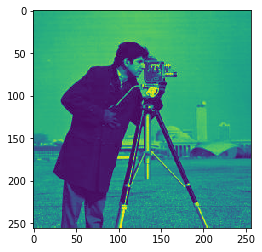

In [84]:
img = plt.imread('./Q_3.jpg')
plt.imshow(img)
print img.shape

In [76]:
result = np.gradient(img)
print result

[array([[  1. ,   1. ,   1. , ...,   3. ,   1. , 255. ],
       [  1. ,   1. ,   1. , ...,   2.5,   0.5, 127. ],
       [  0. ,   0. ,   0. , ...,   0. , 127.5, 127.5],
       ...,
       [  3. , 122.5,   6. , ...,   1.5,   2.5, 123.5],
       [  5. ,   5. , 122. , ..., 121.5,   3. ,   0.5],
       [246. ,  22. , 254. , ..., 244. ,   0. , 255. ]]), array([[  0. ,   0. ,   0. , ...,   1.5,   2. ,   2. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ..., 126.5, 126.5, 255. ],
       ...,
       [ 18. ,  10.5, 118. , ..., 124. , 113.5, 239. ],
       [242. , 123.5,  22.5, ..., 127.5, 115. , 235. ],
       [ 18. , 127.5,  18.5, ...,  10. , 120.5, 234. ]])]


In [83]:
print type(result)
print len(result), type(result[0]), result[0]
print result[0].dtype, result[0].shape

<type 'list'>
2 <type 'numpy.ndarray'> [[  1.    1.    1.  ...   3.    1.  255. ]
 [  1.    1.    1.  ...   2.5   0.5 127. ]
 [  0.    0.    0.  ...   0.  127.5 127.5]
 ...
 [  3.  122.5   6.  ...   1.5   2.5 123.5]
 [  5.    5.  122.  ... 121.5   3.    0.5]
 [246.   22.  254.  ... 244.    0.  255. ]]
float64 (256, 256)


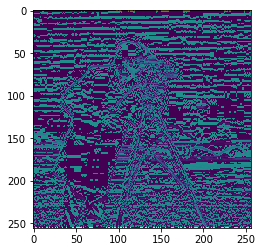

In [86]:
plt.imshow(result[0])

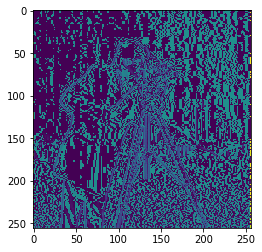

In [85]:
plt.imshow(result[1])

Already in the range [0,255]

In [107]:
print np.min(result[0]), np.max(result[0])
print np.min(result[1]), np.max(result[1])

0.0 255.0
0.0 255.0


ii. Compute Magnitude

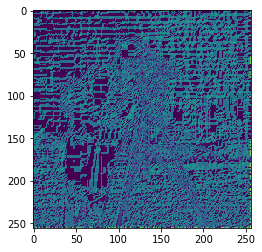

In [91]:
magnitude = np.sqrt(result[0] ** 2 + result[1] ** 2)
plt.imshow(magnitude)

iii. Compute Orientation

0.0 1.5707963267948966


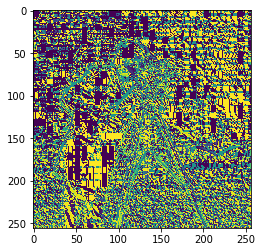

In [110]:
orientation = np.arctan2(result[1], result[0])
plt.imshow(orientation)
print np.min(orientation), np.max(orientation)

iv. Compute histogram of gradient orientation (angle between 0 and $2\pi$)

In [160]:
WINDOWSZ = 8
BINS = 9
FEATMAPSZ = result[0].shape
FEATMAPSZ = FEATMAPSZ[0] / WINDOWSZ, FEATMAPSZ[1] / WINDOWSZ, BINS
print FEATMAPSZ
hog = np.zeros(FEATMAPSZ)

(32, 32, 9)


In [161]:
BINSZ = 20
bin_starts = np.arange(0, 180, BINSZ)
print len(bin_starts), bin_starts

9 [  0  20  40  60  80 100 120 140 160]


In [162]:
int(90 / float(20))

4

In [163]:
for x in range(FEATMAPSZ[0]):
    for y in range(FEATMAPSZ[1]):
        m_window = magnitude[x: x + WINDOWSZ, y: y + WINDOWSZ]
        o_window = np.rad2deg(orientation[x: x + WINDOWSZ, y: y + WINDOWSZ])
        for m, o in zip(np.ravel(m_window), np.ravel(o_window)):
            binval = o / float(20)
            binval_remainder = binval - int(binval)
            lobin = int(binval)
            hibin = lobin + 1
            hog[x: x + WINDOWSZ, y: y + WINDOWSZ, lobin] += m * (1 - binval_remainder)
            hog[x: x + WINDOWSZ, y: y + WINDOWSZ, hibin] += m * binval_remainder

[8436.26794053   27.38387465  543.03113605  196.98536894  268.06700863
  256.38618407    0.            0.            0.        ]


<BarContainer object of 9 artists>

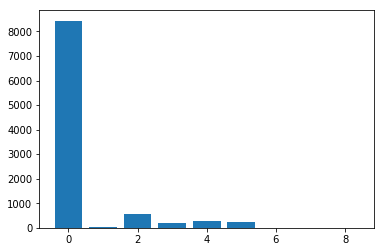

In [164]:
print hog[1,1]
plt.bar(np.arange(len(hog[1,1])), hog[1,1])

(32, 32, 9) 0.0 237133.33170664977
(32, 32, 9) 0.0 1.0


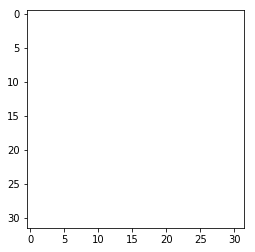

In [189]:
print hog.shape, np.min(hog), np.max(hog)
hog = hog / np.max(hog)
print hog.shape, np.min(hog), np.max(hog)
plt.imshow(hog[:,:,4:8])

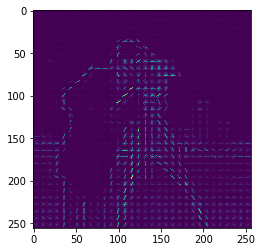

In [170]:
from skimage.feature import hog as hogf
fd, hog_image = hogf(img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), visualize=True, multichannel=False)
plt.imshow(hog_image)

In [182]:
fd[:9]

array([0.04618669, 0.09105523, 0.        , 0.02065532, 0.81288582,
       0.02921103, 0.        , 0.        , 0.        ])

0.19938573526033923

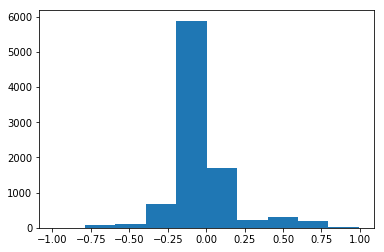

In [190]:
flt = np.ravel(hog)
plt.hist(flt - fd)
np.std(flt - fd)

# Problem 4

Load walk_1.jpg and walk_2.jpg images in Matlab. Convert them to gray scale and subtract walk_2.jpg from walk_1.jpg. What is the result? Why?

/Users/jains/tvenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


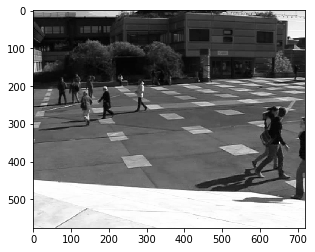

In [54]:
from scipy import misc
walk1 = misc.imread('./walk_1.jpg', mode='L')
plt.imshow(walk1, cmap='gray')

/Users/jains/tvenv/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


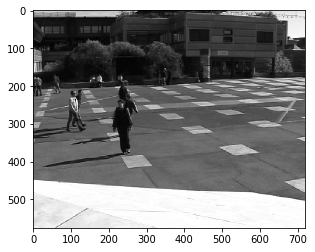

In [55]:
walk2 = misc.imread('./walk_2.jpg', mode='L')
plt.imshow(walk2, cmap='gray')

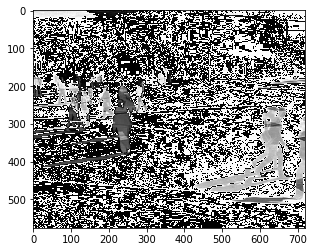

In [56]:
plt.imshow(walk1-walk2, cmap='gray')

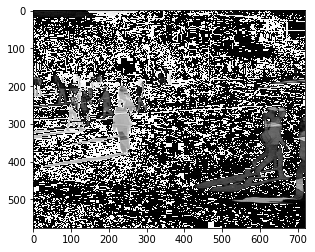

In [57]:
plt.imshow(walk2-walk1, cmap='gray')

### Problem 5
5. Apply canny edge detector on the “Q_3.jpg” using Matlab function “edge”. Test different values of ‘Sigma’ and ‘Threshold’.

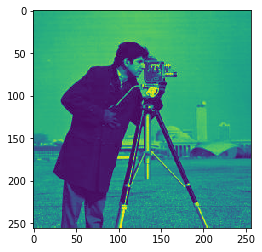

In [58]:
q3 = plt.imread('./Q_3.jpg')
plt.imshow(q3)

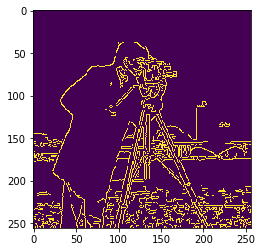

In [67]:
plt.imshow(cv.Canny(q3,100,200))

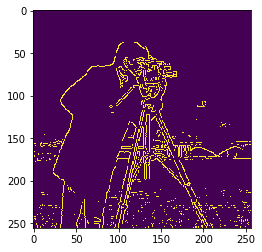

In [68]:
plt.imshow(cv.Canny(q3,200,200))

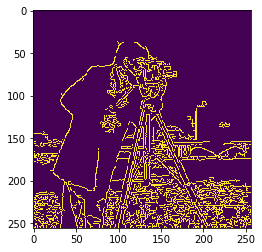

In [69]:
plt.imshow(cv.Canny(q3,10,200))

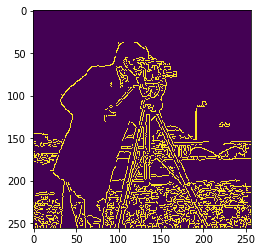

In [70]:
plt.imshow(cv.Canny(q3,50,200))